# Chapter 5: Interpretable Models

In [1]:
# Imports

from preprocess_bike_data import data_pipeline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading in the Data

In [2]:
df = data_pipeline()
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,days_since_2011,season_SPRING,season_SUMMER,season_WINTER,holiday_NO HOLIDAY,workingday_WORKING DAY,weathersit_MISTY,weathersit_RAIN/SNOW/STORM
0,WINTER,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,8.175849,80.5833,10.749882,985,0,0,0,1,1,0,1,0
1,WINTER,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,MISTY,9.083466,69.6087,16.652113,801,1,0,0,1,1,0,1,0
2,WINTER,2011,JAN,NO HOLIDAY,MON,WORKING DAY,GOOD,1.229108,43.7273,16.636703,1349,2,0,0,1,1,1,0,0
3,WINTER,2011,JAN,NO HOLIDAY,TUE,WORKING DAY,GOOD,1.400000,59.0435,10.739832,1562,3,0,0,1,1,1,0,0
4,WINTER,2011,JAN,NO HOLIDAY,WED,WORKING DAY,GOOD,2.666979,43.6957,12.522300,1600,4,0,0,1,1,1,0,0


## Dropping Some Columns

In [3]:
sub_features = ['season', 'holiday','workingday', 'weathersit']
df.drop(sub_features + ['yr', 'mnth', 'weekday'], inplace=True, axis=1)
df.head()

,temp,hum,windspeed,cnt,days_since_2011,season_SPRING,season_SUMMER,season_WINTER,holiday_NO HOLIDAY,workingday_WORKING DAY,weathersit_MISTY,weathersit_RAIN/SNOW/STORM
0,8.175849,80.5833,10.749882,985,0,0,0,1,1,0,1,0
1,9.083466,69.6087,16.652113,801,1,0,0,1,1,0,1,0
2,1.229108,43.7273,16.636703,1349,2,0,0,1,1,1,0,0
3,1.400000,59.0435,10.739832,1562,3,0,0,1,1,1,0,0
4,2.666979,43.6957,12.522300,1600,4,0,0,1,1,1,0,0


## Modeling

### Establishing Features and Target

In [4]:
features = [col for col in df.columns if col != 'cnt']
target = 'cnt'

### Linear Regression

In [6]:
import statsmodels.api as sm

model = sm.OLS(df['cnt'], df[features])
results = model.fit()
results.params

temp                           116.665202
hum                             -3.993832
windspeed                      -22.850772
days_since_2011                  5.287075
season_SPRING                  587.996465
season_SUMMER                 -237.651230
season_WINTER                 -166.550381
holiday_NO HOLIDAY            1472.214874
workingday_WORKING DAY         129.406767
weathersit_MISTY              -552.965982
weathersit_RAIN/SNOW/STORM   -2278.483205
dtype: float64

In [7]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              1851.
Date:                Sun, 27 Nov 2022   Prob (F-statistic):                        0.00
Time:                        23:02:09   Log-Likelihood:                         -6014.8
No. Observations:                 731   AIC:                                  1.205e+04
Df Residuals:                     720   BIC:                                  1.210e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
temp                         116.6652      7.192     16.222      0.000     102.545     130.785
hum                           -3.9938      2.518     -1.586      0.113      -8.938       0.950
windspeed                    -22.8508      6.407     -3.567      0.000     -35.429     -10.273
days_since_2011                5.2871      0.169     31.303      0.000       4.955       5.619
season_SPRING                587.9965    111.794      5.260      0.000     368.515     807.478
season_SUMMER               -237.6512    137.968     -1.723      0.085    -508.519      33.217
season_WINTER               -166.5504    106.786     -1.560      0.119    -376.200      43.099
holiday_NO HOLIDAY          1472.2149    170.158      8.652      0.000    1138.150    1806.280
workingday_WORKING DAY       129.4068     75.424      1.716      0.087     -18.671     277.485
weathersit_MISTY            -552.9660     86.025     -6.428      0.000    -721.857    -384.075
weathersit_RAIN/SNOW/STORM -2278.4832    222.697    -10.231      0.000   -2715.696   -1841.271
==============================================================================
Omnibus:                       91.953   Durbin-Watson:                   1.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.146
Skew:                          -0.713   Prob(JB):                     2.10e-44
Kurtosis:                       5.138   Cond. No.                     2.88e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Weight Plot for Coefficients

In [8]:
# Extracting and storing the coefficients and standard errors in a dictionary
coef = results.params.to_dict()
std_error = results.bse.to_dict()

In [10]:
# Converting the dictionary into Dataframe

for key, val in coef.items():
    coef[key] = [val]

t = pd.DataFrame(coef).T
t['std_error'] = t.index.map(std_error)
t.columns = ['coefficients', 'std_error']

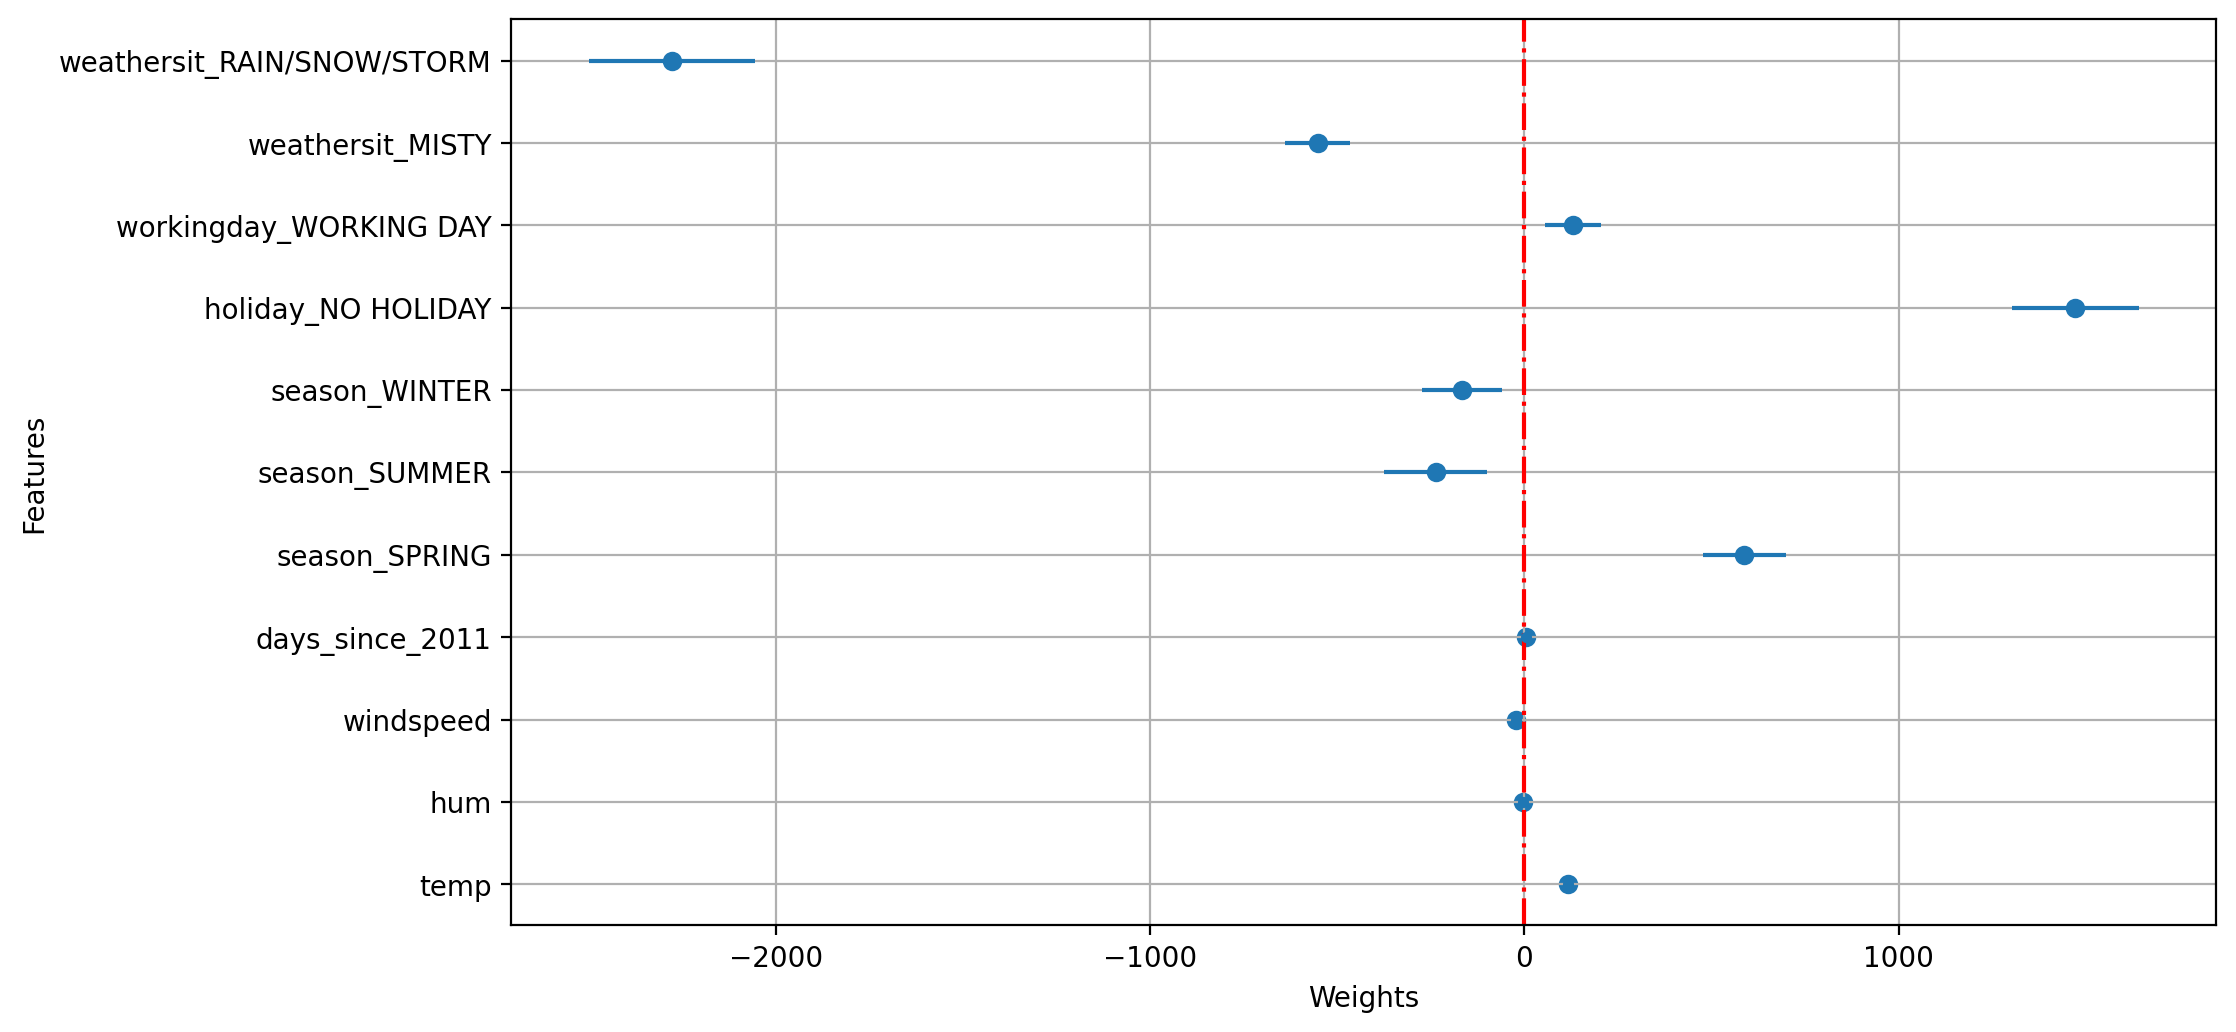

In [11]:
# Plotting the Weight Plot

plt.rcParams['figure.dpi'] = 200
fig, ax = plt.subplots(figsize=(11,6))
ax.scatter(t['coefficients'], t.index)
ax.errorbar(t['coefficients'], t.index, xerr=t['std_error'], fmt = '.')
ax.axvline(0, linestyle='-.', color='red')
plt.xlabel("Weights")
plt.ylabel("Features")
plt.grid('True')